# DATA620 Project 1: Centrality Measures
## Alain T. Kuiete

### Importing Libraries

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from operator import itemgetter

## Loading the Dataset


In [3]:
students = pd.read_csv('https://raw.githubusercontent.com/AlainKuiete/DATA620ASSIGNMENTS/master/out.moreno_seventh_seventh',
                       sep=' ', header=None, names=['stud1', 'stud2', 'wght'])


In [4]:
students.head()

,stud1,stud2,wght
0,%,asym,posweighted
1,%,376,29
2,1,2,1
3,1,3,1
4,1,4,2


In [5]:
students = students.iloc[2:,:].reset_index(drop=True)

In [6]:
students.head()

,stud1,stud2,wght
0,1,2,1
1,1,3,1
2,1,4,2
3,1,5,2
4,1,6,3


In [7]:
attributes = pd.read_csv('https://raw.githubusercontent.com/AlainKuiete/DATA620ASSIGNMENTS/master/ent.moreno_seventh_seventh.student.gender', 
                        header=None, names=['gender'])

In [8]:
attributes.insert(0, 'Id', attributes.index +1,True) 

In [9]:
attributes.head()

,Id,gender
0,1,male
1,2,male
2,3,male
3,4,male
4,5,male


In [10]:
attributes = attributes.astype({"Id":str})

In [11]:
attributes.shape

(29, 2)

In [12]:
attr_dict = dict(zip(attributes.Id, attributes.gender))


### Create Graph

In [13]:
g = nx.Graph()

### Add nodes attributes

In [14]:
nodes_id = [n[0] for n in attributes]

In [15]:
#g.add_nodes_from(nodes_id, attr_dict, 'gender')

### Add edges and edge properties

In [16]:
for i, line in students.iterrows():
    g.add_edge(line[0], line[1], weigth=line[2])
    

In [17]:
nx.set_node_attributes(g, attr_dict, 'gender')

In [18]:
node_gender = list(nx.get_node_attributes(g, 'gender').values())

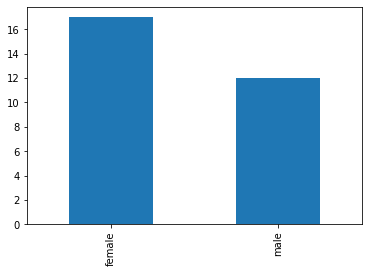

In [19]:
pd.value_counts(node_gender).plot.bar()

In [20]:
#g.nodes(data=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


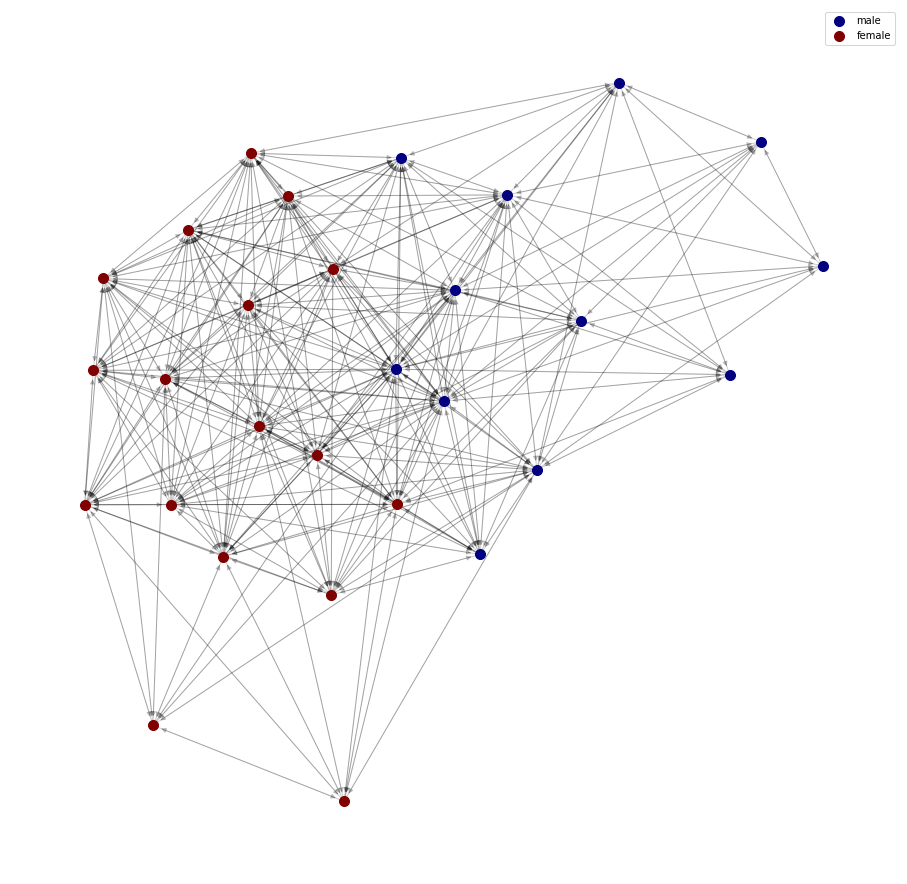

In [21]:
h = nx.DiGraph(g)
plt.figure(figsize=(16, 16))
genders = set(node_gender)
node_gender_dict = nx.get_node_attributes(h, 'gender')
colors = [plt.cm.jet(x) for x in np.linspace(0,1,len(genders))]
pos = nx.spring_layout(h)

for i, gender in enumerate(genders):
    gender_nodes = [node for node, value in node_gender_dict.items() if value == gender]
    nx.draw_networkx_nodes(h, pos, nodelist=gender_nodes, node_color=colors[i], label=gender,
                         with_labels=False, node_size=100, cmap=plt.cm.jet)
    
nx.draw_networkx_edges(h, pos, alpha=0.2)


plt.legend()
plt.axis('off')
plt.show()




## Degree Centrality

### The degree of a node is the number of neighbors that it has. 
### The degree centrality is the number of neighbors divided by all possible neighbors that it could have. 

#### Number of Neighbors that a node has / Number of Neighbors that node could possibly have.

#### degree of each node

In [22]:
degree_dict = dict(g.degree(g.nodes()))
nx.set_node_attributes(g, degree_dict, 'degree')

#### Nodes with high degree are most important nodes in the network. Here we find the top 5.

In [23]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [24]:
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d, nx.get_node_attributes(g,'gender')[d[0]] )

Top 5 nodes by degree:
('5', 28) male
('6', 28) male
('4', 23) male
('11', 22) female
('9', 21) female


### There are three popular men at the top, follow by two popular women.

In [25]:
degrees = [len(list(g.neighbors(n))) for n in g.nodes()]
deg_cent = nx.degree_centrality(g)

#### Histogram of degree centrality 

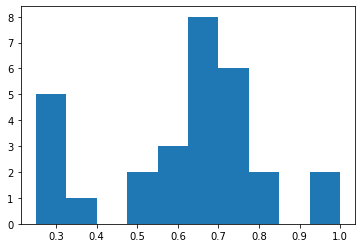

In [26]:
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

#### Scatter plot of centrality distribution in term of degree distribution

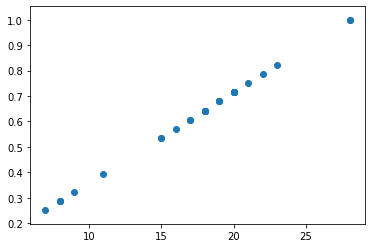

In [27]:
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

#### Nodes that can broadcast messages efficiently to lot of people at one degree of separartion away.

In [28]:
def nodes_with_highest_deg_cent(h):
    deg_cent = nx.degree_centrality(h)
    max_dc = max(list(deg_cent.values()))
    nodes = set()
    for k,v in deg_cent.items():
        if v == max_dc:
            nodes.add(k)
    return nodes

In [29]:
top_dc = nodes_with_highest_deg_cent(g)

In [30]:
print(top_dc)

{'5', '6'}


In [31]:
nx.get_node_attributes(g,'gender')['6']

'male'

In [32]:
nx.get_node_attributes(g,'gender')['5']

'male'

Males are prefered to relais efficiently message between males and females.

## Closeness Centrality

### Average shortest path from a node A to a node B

In [33]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

In [34]:
path_exists(g,'5', '6')

Path exists between nodes 5 and 6


True

### Most central nodes

In [35]:
def nodes_with_highest_close_cent(h):
    close_cent = nx.closeness_centrality(h)
    max_cc = max(list(close_cent.values()))
    nodes = set()
    for k,v in close_cent.items():
        if v == max_cc:
            nodes.add(k)
    return nodes

In [36]:
top_cc = nodes_with_highest_close_cent(g)
print(top_cc)

{'5', '6'}


## Betweenness Centrality

### Visualization of the network where the node color varies with Degree and size with Betweenness Centrality

(-0.7209696291951024, 1.10662898834406, -1.0333479205165497, 1.072505833877935)

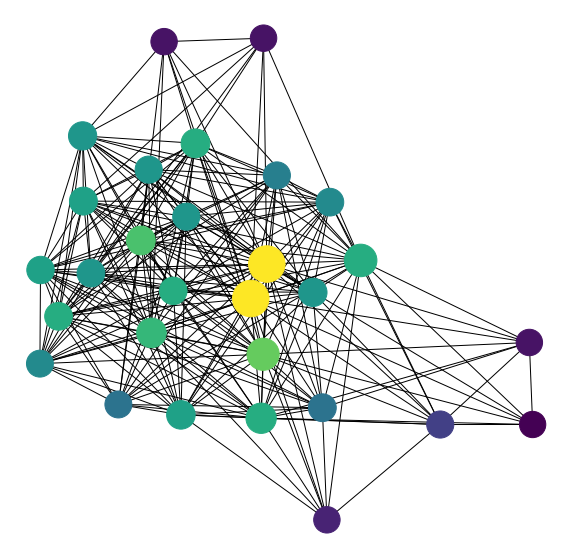

In [37]:
pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

#### Number of shortest paths through a node / all possible shortest paths

In [38]:
bet_cen = nx.betweenness_centrality(g)

In [39]:
deg_cen = nx.degree_centrality(g)

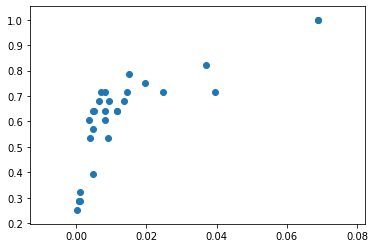

In [40]:
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))
plt.show()

In [41]:
def nodes_with_highest_bet_cent(h):
    deg_cent = nx.betweenness_centrality(h)
    max_dc = max(list(deg_cent.values()))
    nodes = set()
    for k,v in deg_cent.items():
        if v == max_dc:
            nodes.add(k)
    return nodes

In [42]:
top_bet = nodes_with_highest_bet_cent(g)

In [43]:
print(top_bet)

{'5', '6'}


### Assertion that the nodes are correctly identified

In [44]:
for node  in top_dc:
    assert nx.degree_centrality(g)[node] == max(nx.degree_centrality(g).values())

In [45]:
# Assign each to an attribute in your network
nx.set_node_attributes(g, bet_cen, 'betweenness')

In [46]:
sorted_betweenness = sorted(bet_cen.items(), key=itemgetter(1), reverse=True)


### Top 5 betweenness centrality  with their gender

In [47]:
print("Top 5 nodes by betweenness centrality:")
for b in sorted_betweenness[:5]:
    print(b,  nx.get_node_attributes(g,'gender')[b[0]])

Top 5 nodes by betweenness centrality:
('5', 0.06891952952293755) male
('6', 0.06891952952293755) male
('22', 0.03952119676326025) male
('4', 0.03704648893140956) male
('2', 0.024687141540549563) male


## Eigenvector Centrality

In [48]:
eigen_cent = nx.eigenvector_centrality(g)

In [49]:
#sorted((v, '{:0.2f}'.format(c)) for v, c in eigen_cent.items())

In [50]:
#print(['%s %0.2f'%(node,centrality[node]) for node in centrality])

In [51]:
# Assign each to an attribute in your network
nx.set_node_attributes(g, eigen_cent, 'eigenvector')

In [52]:
sorted_eigenvector = sorted(eigen_cent.items(), key=itemgetter(1), reverse=True)


In [53]:
print("Top 5 nodes by Eigenvector centrality:")
for e in sorted_eigenvector[:5]:
    print(e,  nx.get_node_attributes(g,'gender')[e[0]])

Top 5 nodes by Eigenvector centrality:
('5', 0.2609978227454962) male
('6', 0.2609978227454962) male
('11', 0.23164028659265418) female
('4', 0.22431555065871642) male
('20', 0.21759075612014064) female


#### Despite males dominance in this students network, there are females who can influence the network which other classmates  can rely on them.